In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
pd.set_option('display.max_columns', None)

In [77]:
df=pd.read_csv('soccer.csv')
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [78]:
df.shape

(660, 15)

# Q1: What is the total number of goals scored in the entire dataset?




In [79]:
total_goals = df['Goals'].sum()

print(total_goals)


7795


# Q2: Which player has scored the most goals as a substitution

In [80]:
substitution_players = df[df['Substitution'] == 1]

player_with_most_goals_as_sub = substitution_players[substitution_players['Goals'] == substitution_players['Goals'].max()]

print("Player with the most goals as a substitution:", player_with_most_goals_as_sub.iloc[0]['Player Names'])
print("Number of goals scored as a substitution:", player_with_most_goals_as_sub.iloc[0]['Goals'])


KeyError: 'Substitution'

# Q3: Find the top 5 players with the most number of goals scored. Also find the total number of goals scored by them

In [ ]:

top_players = df.sort_values(by='Goals', ascending=False).head(5)

total_goals_by_top_players = top_players['Goals'].sum()

print(top_players[['Player Names', 'Goals']])
print("\nTotal number of goals scored by the top 5 players:", total_goals_by_top_players)


          Player Names  Goals
5    Cristiano Ronaldo     42
12        Lionel Messi     37
391      Ciro Immobile     36
195       Lionel Messi     36
317        Carlos Vela     36

Total number of goals scored by the top 5 players: 187


# Q4: What are the top 10 countries with the most number of players in the dataset?

In [ ]:

top_10_countries = df['Country'].value_counts().head(10)

print(top_10_countries)


Country
Spain           100
Italy           100
Germany         100
Brazil          100
England          80
France           60
USA              40
Portugal         40
 Netherlands     40
Name: count, dtype: int64


# Q5: # Q1. Create a new dataframe after removing the ourliers for Mins Column in the dataset (conside the upper quantile to be 99 percentile and the lower quantile to be 1 percentile.). After that Find the difference in the number of rows?

* Difference is df.shape(only rows) - df.shape(rows of filtered data only)

In [ ]:

lower_quantile = 0.01
upper_quantile = 0.99 

lower_threshold = df['Mins'].quantile(lower_quantile)
upper_threshold = df['Mins'].quantile(upper_quantile)

filtered_df = df[(df['Mins'] >= lower_threshold) & (df['Mins'] <= upper_threshold)]

difference_in_rows = df.shape[0] - filtered_df.shape[0]

print("Difference in the number of rows:", difference_in_rows)


Difference in the number of rows: 14


# Q6: Which top 5 players have scored the maximum number of goals throughout all the years? Display them in descending order

In [ ]:

top_players_goals = df.groupby('Player Names')['Goals'].sum().reset_index()
top_players_goals = top_players_goals.sort_values(by='Goals', ascending=False).head(5)

print(top_players_goals)


           Player Names  Goals
259        Lionel Messi    135
93    Cristiano Ronaldo    128
368  Robert Lewandowski    127
86        Ciro Immobile    107
273         Luis Suarez     95


# Q7. Using Bar Plot show in which year has Cristiano Ronaldo scored the most number of goals?

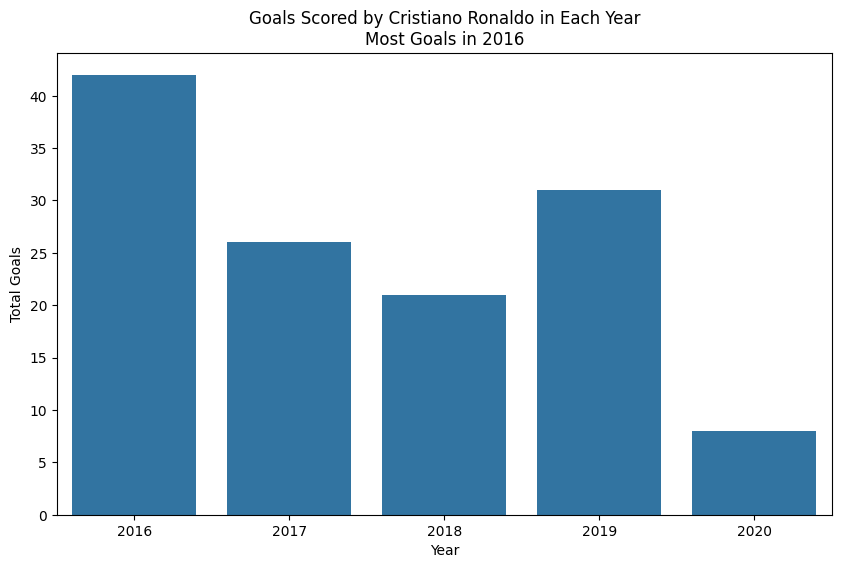

In [ ]:

cristiano_ronaldo = df[df['Player Names'] == 'Cristiano Ronaldo']

goals_by_year = cristiano_ronaldo.groupby('Year')['Goals'].sum().reset_index()

max_goals_year = goals_by_year[goals_by_year['Goals'] == goals_by_year['Goals'].max()]['Year'].values[0]

plt.figure(figsize=(10, 6))
sns.barplot(data=goals_by_year, x='Year', y='Goals')
plt.title(f"Goals Scored by Cristiano Ronaldo in Each Year\nMost Goals in {max_goals_year}")
plt.xlabel("Year")
plt.ylabel("Total Goals")
plt.show()


# Q8. In the year 2019 who has more Goals between Ronaldo and Messi? 
- First print them normally 
- Display the comparison using a bar plot

Goals scored by Christiano Ronaldo in 2019: 31
Goals scored by Lionel Messi in 2019: 25


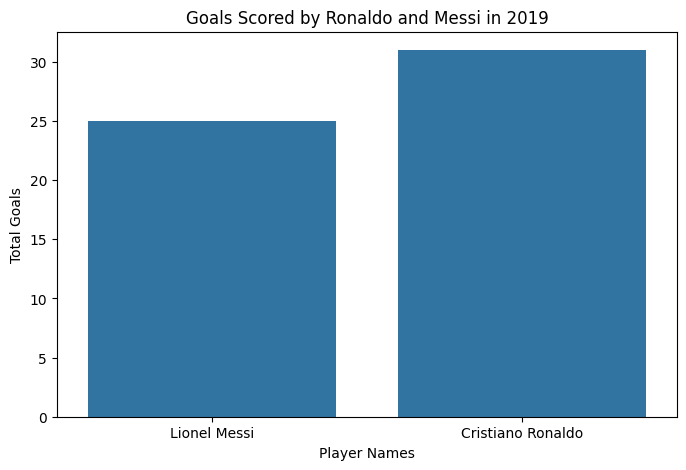

In [ ]:
year_2019_data = df[(df['Year'] == 2019) & ((df['Player Names'] == 'Cristiano Ronaldo') | (df['Player Names'] == 'Lionel Messi'))]

ronaldo_goals_2019 = year_2019_data[year_2019_data['Player Names'] == 'Cristiano Ronaldo']['Goals'].values[0]
messi_goals_2019 = year_2019_data[year_2019_data['Player Names'] == 'Lionel Messi']['Goals'].values[0]

print("Goals scored by Christiano Ronaldo in 2019:", ronaldo_goals_2019)
print("Goals scored by Lionel Messi in 2019:", messi_goals_2019)

plt.figure(figsize=(8, 5))
sns.barplot(x='Player Names', y='Goals', data=year_2019_data)
plt.title("Goals Scored by Ronaldo and Messi in 2019")
plt.xlabel("Player Names")
plt.ylabel("Total Goals")
plt.show()


# Q9: Using Pie Chart show the amount of data various Countries are containing in this dataset(use the Country Columns Display the percentage of data as well in the pie chart

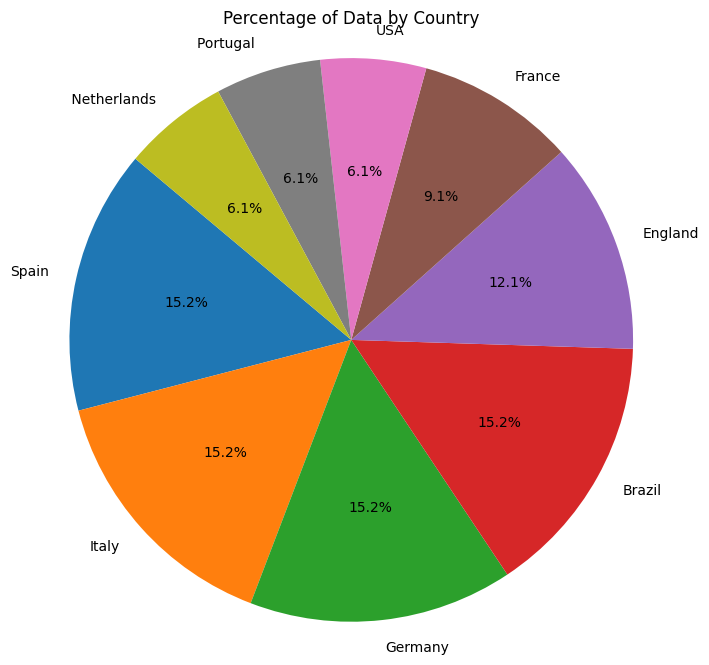

In [ ]:
country_data_counts = df['Country'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(country_data_counts, labels=country_data_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Percentage of Data by Country")
plt.axis('equal')

plt.show()


# Q10: Display a Heatmap  to show the correlation between the columns in the dataset. The heatmap should have the value of the correlation printed within the boxes.

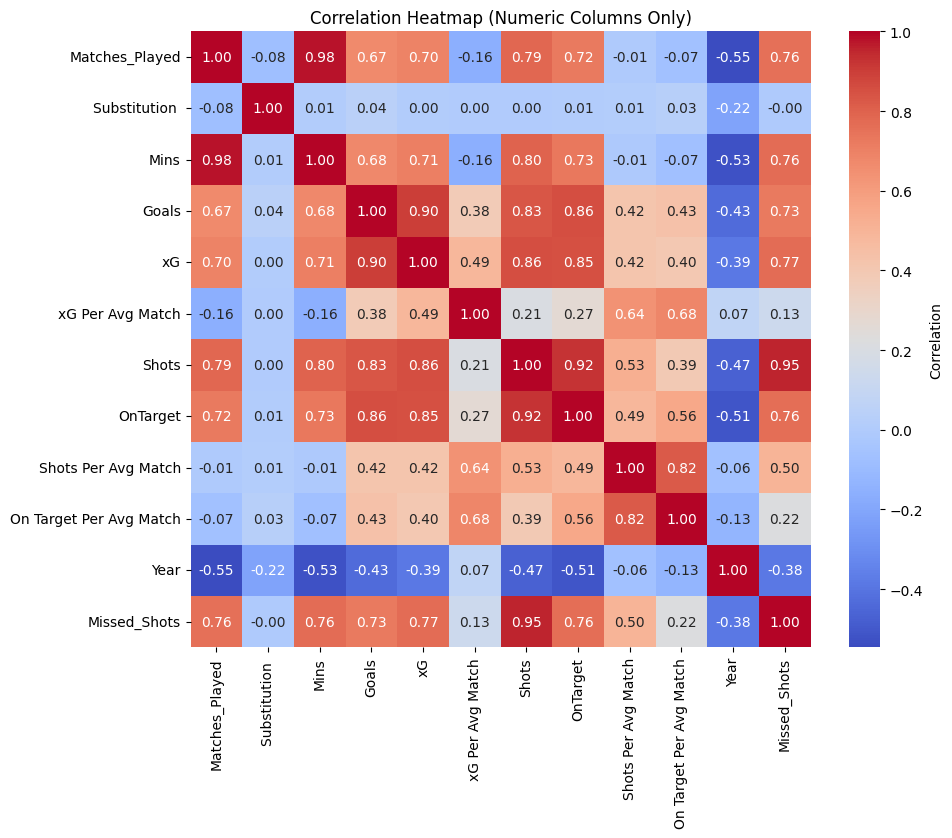

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={"label": "Correlation"})
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


# Q11: Which Country has the maximum median OnTarget Shots among all the Countries in the year 2020?

In [ ]:
data_2020 = df[df['Year'] == 2020]

country_median_ontarget_shots = data_2020.groupby('Country')['OnTarget'].median()

max_median_country = country_median_ontarget_shots.idxmax()

print(max_median_country)


 Netherlands


# Q12. Who has the best average  Goals per minute?
* Consider only those players who have played more than 30 games
* Then Find Goals per minute
* Find Mean of Goals per minute and sort the values

In [ ]:
filtered_players = df[df['Matches_Played'] > 30]

filtered_players['Goals_Per_Minute'] = filtered_players['Goals'] / filtered_players['Mins']
mean_goals_per_minute = round(filtered_players['Goals_Per_Minute'].mean(), 5)
sorted_players = filtered_players.sort_values(by='Goals_Per_Minute', ascending=False)

print("Player with the best average Goals per minute:", sorted_players.iloc[0]['Player Names'])
print("Mean Goals per minute:", mean_goals_per_minute)


Player with the best average Goals per minute: Lionel Messi
Mean Goals per minute: 0.00543


/tmp/ipykernel_6097/3024190123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_players['Goals_Per_Minute'] = filtered_players['Goals'] / filtered_players['Mins']


# Q 13. Which Player has the least and most number of missed shots in the dataset?
* Missed Shots=Shots-On Target

In [ ]:
df['Missed_Shots'] = df['Shots'] - df['OnTarget']

player_with_least_missed_shots = df[df['Missed_Shots'] == df['Missed_Shots'].min()]['Player Names'].values[0]
player_with_most_missed_shots = df[df['Missed_Shots'] == df['Missed_Shots'].max()]['Player Names'].values[0]

print("Least missed shots:", player_with_least_missed_shots)
print("Most missed shots:", player_with_most_missed_shots)


Least missed shots: Esteban Burgos
Most missed shots: Cristiano Ronaldo


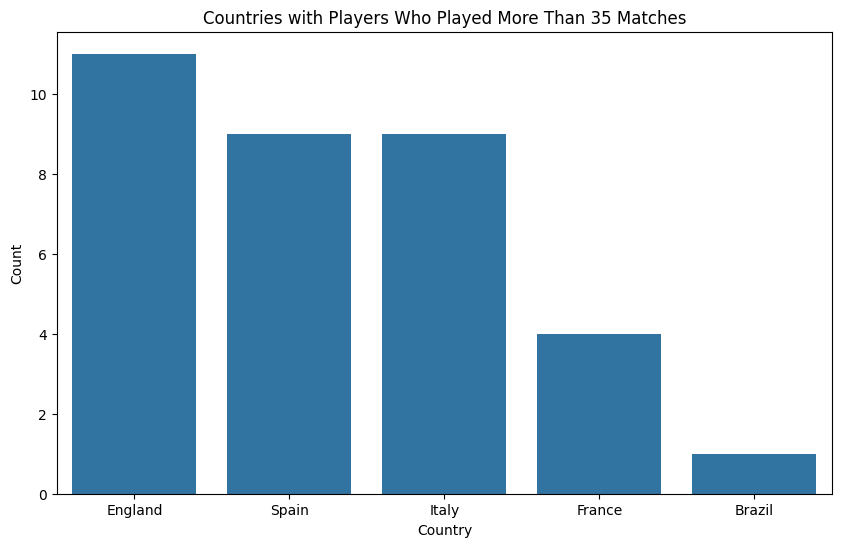

Number of countries with players who played more than 35 matches: 5


In [ ]:
filtered_players = df[df['Matches_Played'] > 35]

countries_with_more_than_35_matches = filtered_players['Country'].nunique()

country_counts = filtered_players['Country'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title("Countries with Players Who Played More Than 35 Matches")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

print("Number of countries with players who played more than 35 matches:", countries_with_more_than_35_matches)


# Q15: Draw a Line Chart to show the comparison of the top 5 highest scoring players in the dataset throughout the years(2016-2020)

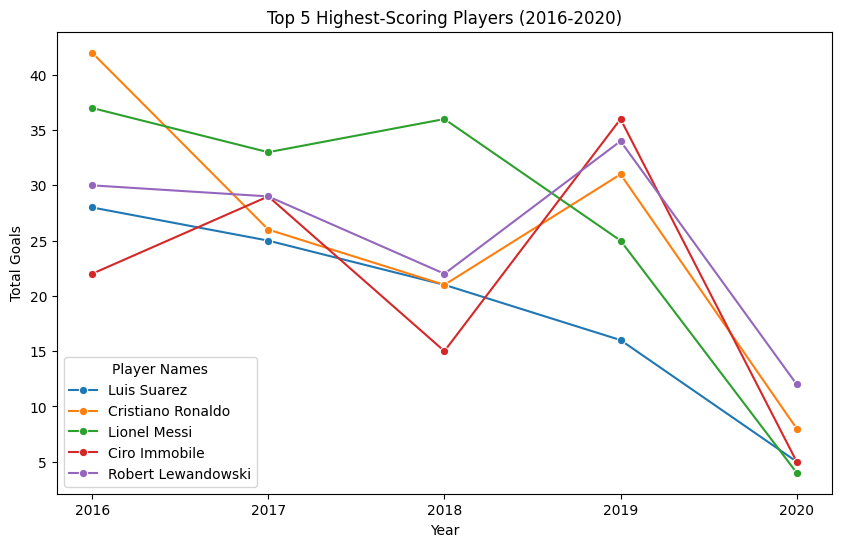

In [ ]:
years_range = list(range(2016, 2021))
filtered_data = df[df['Year'].isin(years_range)]

top_players = filtered_data.groupby('Player Names')['Goals'].sum().nlargest(5).index

top_players_data = filtered_data[filtered_data['Player Names'].isin(top_players)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=top_players_data, x='Year', y='Goals', hue='Player Names', marker='o')

plt.xticks(years_range)

plt.title("Top 5 Highest-Scoring Players (2016-2020)")
plt.xlabel("Year")
plt.ylabel("Total Goals")
plt.legend(title="Player Names")
plt.show()
